In [2]:
import os
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns

In [5]:
pd.merge?

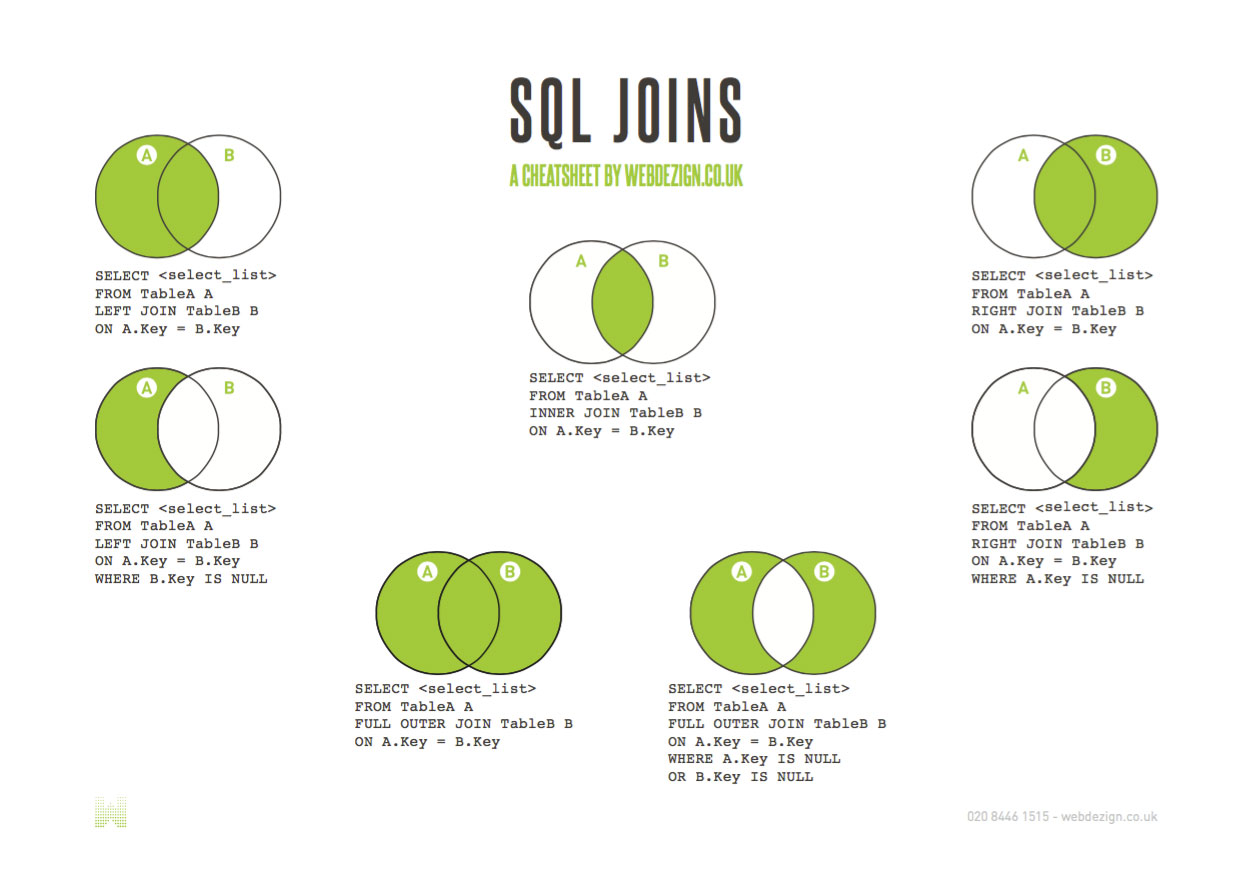

In [21]:
from IPython.display import Image
Image("https://adiyatmubarak.files.wordpress.com/2016/01/sql.jpg")


# 7.1 Merge
pandas.merge is similar to the _SQL join_ operations; it links rows of tables using one or more _keys_

Syntax:

`merge(df1, df2, 
       how='left', on='key', left_on=None, right_on=None, 
       left_index=False, right_index=False, 
       sort=True, copy=True,
       suffixes=('_x', '_y'))`


The syntax includes specifications of the following arguments

* **Which column to merge on;** 
    * the `on='key'` if the same key is in the two DFs, 
    * or `left_on='lkey', right_on='rkey'` if the keys have different names in the DFs 
    * Note: To merge on multiple keys, pass a list of column names
 
 
* **The nature of the join;** 
    * the `how=` option, with `left`, `right`, `outer`
    * By default, the merge is an `inner` join
    
 
* Tuple of string values to append to **overlapping column names** to identify them in the merged dataset
    * the `suffixes=` option
    * defaults to `('_x', '_y')`
    
 
* If you wish **to merge on the DF index**, pass `left_index=True` or `right_index=True` or both.


* Sort the result DataFrame by the join keys in lexicographical order or not;
    * `sort=` option; Defaults to True, setting to False will improve performance substantially in many cases
    
    
    
> _Note:_ For the **official Documentation** refer http://pandas.pydata.org/pandas-docs/dev/merging.html

In [3]:
# Let's define a few toy datasets to use as examples

df0 = DataFrame({'key': ['a', 'a', 'c', 'd', 'e'], 'data0': np.random.randint(0, 100, 5)})
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': np.random.randint(0, 100, 7)})
df2 = DataFrame({'key': ['a', 'b', 'd', 'f', 'g'], 'data1': np.random.randint(0, 100, 5)})

df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data3': np.random.randint(0, 100, 7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'], 'data4': np.random.randint(0, 100, 3)})



In [4]:
df0

,data0,key
0,99,a
1,26,a
2,83,c
3,65,d
4,28,e


In [5]:
df1

,data1,key
0,65,b
1,39,b
2,3,a
3,18,c
4,37,a
5,10,a
6,35,b


In [6]:
# 1. Default merge with no parameters


pd.merge(df0, df1,on='key',how='inner')

# We see that its an inner join by default (output key is the intersection of input keys)
# Merge happens on the column 'key' which is common to both datasets;
    # We could've written pd.merge(df1, df2, on='key', how='inner') to the same effect

,data0,key,data1
0,99,a,3
1,99,a,37
2,99,a,10
3,26,a,3
4,26,a,37
5,26,a,10
6,83,c,18


In [38]:
# Outer Join
pd.merge(df0, df2,on='key',how='outer')

,data0,key,data2
0,76.0,a,54.0
1,81.0,b,53.0
2,7.0,c,NaN
3,0.0,d,81.0
4,72.0,e,NaN
5,NaN,f,40.0
6,NaN,g,20.0


In [42]:
#pd.merge(df1, df4) 
# would yield an error because there are no matching column names to merge on 

In [16]:
df4

,data4,rkey
0,75,a
1,96,b
2,51,d


In [43]:
# 2. Specifying which columns to merge on (if keys have different names in datasets)

pd.merge(df1, df4, left_on='key', right_on='rkey')
# still an inner join!

,data1,key,data4,rkey
0,8,b,14,b
1,8,b,14,b
2,92,b,14,b
3,51,a,56,a
4,37,a,56,a
5,10,a,56,a


In [18]:
# 3. Specifying which type of join: outer

pd.merge(df1, df2, how='outer')
# the merged dataset will have a union of the keys, imputing NaNs where values aren't found

,data1,key,data2
0,88.0,b,12.0
1,56.0,b,12.0
2,71.0,b,12.0
3,25.0,a,37.0
4,62.0,a,37.0
5,68.0,a,37.0
6,61.0,c,NaN
7,NaN,d,16.0
8,NaN,f,56.0
9,NaN,g,65.0


In [19]:
# 3.1 Try out a left join

dfx = pd.merge(df1, df2, how='left')

# value 'c' is absent in df2, so there will be a NaN in column data2

,data1,key,data2
0,88,b,12.0
1,56,b,12.0
2,25,a,37.0
3,61,c,NaN
4,62,a,37.0
5,68,a,37.0
6,71,b,12.0


In [47]:
df1

,data1,key
0,8,b
1,8,b
2,51,a
3,23,c
4,37,a
5,10,a
6,92,b


In [48]:
df2

,data2,key
0,54,a
1,53,b
2,81,d
3,40,f
4,20,g


In [53]:
# Specifying suffixes to identify columns with the same name
pd.merge(df1, df2, on='key', suffixes=['_df1', '_df2'])

,data1_df1,key,data1_df2
0,66,b,80
1,31,b,80
2,33,b,80
3,97,a,96
4,81,a,96
5,31,a,96


In [ ]:
print zip(df1.key, df1.key2)
print zip(df2.key, df2.key2)

In [ ]:
pd.merge(df1, df2, on=['key', 'key2'], suffixes=('_1', '_2'))

------------------------------------------------------------------------------------------------------------------------------

In [24]:
DataFrame.join?

### 7.2 The `.join()` method

.join is a convenient **DataFrame method** for combining many DataFrames objects with the same or similar indexes but non-overlapping columns into a single result DataFrame.

By default, the `join` method performs a _left join_ on the join keys.

For simple **index-on-index merges** we can pass a list of DataFrames to `join.`

In [ ]:
#Merge = Inner join by default
#join = Left join

In [ ]:
#1.head(10)
#2.#rows - count 
a = 100
b = 50
output <= 100

In [71]:
df = DataFrame(np.random.randint(0, 50, 32).reshape(8, 4), columns=list('WXYZ'), index=list('abcdefgh'))

df1 = df.ix[2:, ['W', 'X']]
df2 = df.ix[:5, ['Y', 'Z']]


C:\Users\adarsha.shivananda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
df1

,W,X
c,45,13
d,21,8
e,5,19
f,37,19
g,11,12
h,39,18


In [58]:
df2

,Y,Z
a,26,49
b,39,29
c,48,34
d,28,48
e,14,11


In [72]:
# Default actions is a left join on the indexes
df1.join(df2)

,W,X,Y,Z
c,14,29,32.0,39.0
d,22,10,37.0,12.0
e,15,35,18.0,1.0
f,37,31,NaN,NaN
g,27,46,NaN,NaN
h,32,36,NaN,NaN


In [31]:
pd.merge(df1, df2, how='left', 
         right_index=True, left_index=True)

,W,X,Y,Z
c,9,13,40.0,18.0
d,46,39,46.0,42.0
e,30,28,0.0,46.0
f,38,1,NaN,NaN
g,29,25,NaN,NaN
h,39,21,NaN,NaN


In [ ]:
# We can alter the nature of the join by passing how=
df1.join(df2, how='outer')

In [ ]:
pd.merge(df1, df2, how='outer', right_index=True, left_index=True)

In [ ]:
%timeit df1.join(df2, how='outer')

In [ ]:
%timeit pd.merge(df1, df2, how='outer', right_index=True, left_index=True)

In [ ]:
# Create a couple more DFs with the same index
df3 = df.ix[0:3, ['X', 'Z']]
df3.columns = ['P', 'Q']

df4 = df.ix[4:6, ['W']]
df4.columns = ['R']


In [ ]:
# Merging multiple DFs with the same index by passing a list of names to .join
df1.join([df2, df3, df4])

In [ ]:
df2.join([df1, df3, df4], how='outer')

------------------------------------------------------------------------------------------------------------------------------

In [32]:
pd.concat?

# 7.3 Concatenating DataFrames 


In [11]:
# Create toy dataframes with non-overlapping indexes
df1 = DataFrame(np.random.randn(3, 3), index=list('abc'), columns=list('PRQ')) 
df2 = DataFrame(np.random.randn(2, 2), index=list('pq'), columns=list('PZ'))


In [12]:
df1

,P,R,Q
a,-0.003413,0.062380,0.934562
b,1.085938,-1.080790,-0.017530
c,-0.135997,1.206045,-1.891105


In [13]:
df2

,P,Z
p,-0.313142,0.554945
q,-0.356187,0.129299


In [14]:
# No overlapping index
pd.concat([df1, df2], axis=0)

,P,Q,R,Z
a,-0.003413,0.934562,0.062380,NaN
b,1.085938,-0.017530,-1.080790,NaN
c,-0.135997,-1.891105,1.206045,NaN
p,-0.313142,NaN,NaN,0.554945
q,-0.356187,NaN,NaN,0.129299


In [82]:
# Create toy dataframes with overlapping indexes
df1 = DataFrame(np.random.randn(9).reshape(3, 3), index=list('abc'), columns=list('XYZ')) 
df2 = DataFrame(np.random.randn(4).reshape(2, 2), index=list('ac'), columns=list('XZ'))

# When axis=0 there will still be 
pd.concat([df1, df2])

,X,Y,Z
a,0.755483,0.421894,-0.272350
b,1.890328,-0.764343,-1.371617
c,-1.656437,0.273006,2.109322
a,-0.069719,NaN,-1.021070
c,-0.546737,NaN,-0.499975


In [78]:
df1

,X,Y,Z
a,-0.458859,0.597870,-0.062891
b,0.880707,0.712590,0.883352
c,-0.528506,-1.632468,1.058920


In [79]:
df2

,X,Z
a,-0.359202,-1.105756
c,0.334832,-0.378493


In [80]:
# Overlapping indexes will be merged
pd.concat([df1, df2], axis=1)

,X,Y,Z,X,Z
a,-0.458859,0.597870,-0.062891,-0.359202,-1.105756
b,0.880707,0.712590,0.883352,NaN,NaN
c,-0.528506,-1.632468,1.058920,0.334832,-0.378493


In [ ]:
pd.concat([df1, df2], axis=1, keys=['df_1', 'df_2'])
# This will create a hierarchical index

------------------------------------------------------------------------------------------------------------------------------

In [41]:
DataFrame.pivot?

In [ ]:
pd.pivot_table?

# 7.5 Converting data from 'long' to 'wide' format using `.pivot()`

Usually, for convenience, data in relational DB is stored in the **long format**
    * fewer columns, label duplication in keys

For certain kinds of analysis, we might prefer to have the data in the **wide format **
    * more columns, unique labels in keys

The `df.pivot()` method takes the names of columns to be used as row (`index=`) and column indexes (`columns=`) and a column to fill in the data as (`values=`)


In [15]:
df = DataFrame({'date': (list(pd.date_range('2000-01-03', '2000-01-05')) * 4),
          'item': (list('ABCD'*3)),
          'status': (np.random.randn(12))})
df

,date,item,status
0,2000-01-03,A,-0.657638
1,2000-01-04,B,-3.361995
2,2000-01-05,C,0.566103
3,2000-01-03,D,-1.797294
4,2000-01-04,A,0.251040
5,2000-01-05,B,0.570719
6,2000-01-03,C,-0.140410
7,2000-01-04,D,-1.288739
8,2000-01-05,A,-0.126611
9,2000-01-03,B,-1.377693


In [100]:
#df.set_index(['date', 'item']).unstack()

In [16]:
df.pivot(index='date', columns='item', values='status')

item,A,B,C,D
date,,,,
2000-01-03,-0.657638,-1.377693,-0.140410,-1.797294
2000-01-04,0.251040,-3.361995,-1.677262,-1.288739
2000-01-05,-0.126611,0.570719,0.566103,-1.041667


In [103]:
df_p = pd.concat([df, df.assign(status = lambda x: x['status'] * 2)])
df_p

,date,item,status
0,2000-01-03,A,-0.497873
1,2000-01-04,B,-1.275140
2,2000-01-05,C,0.649522
3,2000-01-03,D,-1.211955
4,2000-01-04,A,-0.562625
5,2000-01-05,B,-0.053573
6,2000-01-03,C,-0.908287
7,2000-01-04,D,-1.594531
8,2000-01-05,A,0.403534
9,2000-01-03,B,-0.724397


In [106]:
pd.pivot_table(data=df_p, 
               index='date', 
               columns='item', 
               values='status', 
               aggfunc=np.sum)

item,A,B,C,D
date,,,,
2000-01-03,-0.746810,-1.086595,-1.362431,-1.817932
2000-01-04,-0.843937,-1.912710,3.523870,-2.391797
2000-01-05,0.605301,-0.080360,0.974282,2.571259


-----------------------------------------------------------------------------------------------------------------------------

# 7.6 $Transforming$ Data

## A. Removing Duplicates

* `df.duplicated()` Returns boolean Series denoting duplicate rows, optionally only considering certain columns
* `df.drop_duplicates()` Returns DataFrame with duplicate rows removed, optionally only considering certain columns


In [17]:
df = DataFrame({'C1': list('ABC' * 2),
          'C2': [1, 2, 4, 3, 2, 4]})
df

,C1,C2
0,A,1
1,B,2
2,C,4
3,A,3
4,B,2
5,C,4


In [108]:
df.duplicated()

0    False
1    False
2    False
3    False
4     True
5     True
dtype: bool

In [18]:
df.assign(Dups = df.duplicated())
# Creates a boolean series to indicate which rows have dups

,C1,C2,Dups
0,A,1,False
1,B,2,False
2,C,4,False
3,A,3,False
4,B,2,True
5,C,4,True


In [110]:
df[df.duplicated()]
# Retain the rows that are duplicates

,C1,C2
4,B,2
5,C,4


In [112]:
df[-df.duplicated()]

,C1,C2
0,A,1
1,B,2
2,C,4
3,A,3


In [40]:
df.drop_duplicates()
# retain the first occurrence of each row (drop dups)

,C1,C2
0,A,1
1,B,2
2,C,4
3,A,3


In [59]:
df.drop_duplicates(keep='last')
# retain the last occurrence of each row (drop dups)

,C1,C2
0,A,1
3,A,3
4,B,2
5,C,4


In [41]:
df.drop_duplicates(keep=False)

,C1,C2
0,A,1
3,A,3


### To find number of duplicated rows

In [43]:
df.duplicated().value_counts()

False    4
True     2
dtype: int64

> By default, these methods consider all of the columns. To specify a subset for detecting duplicates, use **`df.drop_duplicates(['list-of-columns'])`**

-----------------------------------------------------------------------------------------------------------------------------

In [ ]:
pd.cut?

## D. Binning Numeric Variables to Categoricals

The `pd.cut()` and `pd.qcut()` functions are used; they take as arguments the following;

* `var`, the continuous variable to discretize
* `bins`, specified as a number (equal sized bins will be computed based on min/max) or a list of bin edges
* `right=True`, a boolean to include the edge or not
* `labels=`, for naming the bins
* `precision=`



In [23]:
# Create a list of 20 integers between 1 and 100
var = np.random.randint(1, 100, 500)
var[:10]

array([14, 44, 80, 71, 18, 67,  6, 73, 68, 70])

In [24]:
# Automatic Binning
pd.cut(var, 5)

[(0.902, 20.6], (40.2, 59.8], (79.4, 99.0], (59.8, 79.4], (0.902, 20.6], ..., (40.2, 59.8], (0.902, 20.6], (40.2, 59.8], (59.8, 79.4], (40.2, 59.8]]
Length: 500
Categories (5, interval[float64]): [(0.902, 20.6] < (20.6, 40.2] < (40.2, 59.8] < (59.8, 79.4] < (79.4, 99.0]]

In [25]:
# Specifying bins manually
pd.cut(var, bins=range(0, 100, 20))

[(0, 20], (40, 60], (60, 80], (60, 80], (0, 20], ..., (40, 60], (0, 20], (40, 60], (60, 80], (40, 60]]
Length: 500
Categories (4, interval[int64]): [(0, 20] < (20, 40] < (40, 60] < (60, 80]]

In [26]:
pd.cut(var, 3, labels=['young', '34to66', '67to99'])[:10]

[young, 34to66, 67to99, 67to99, young, 67to99, young, 67to99, 67to99, 67to99]
Categories (3, object): [young < 34to66 < 67to99]

In [27]:
pd.concat([Series(var[:10], name='Values'), 
           Series(pd.cut(var, 3, labels=['A', 'B', 'C'])[:10], name='Bins')], axis=1)

,Values,Bins
0,14,A
1,44,B
2,80,C
3,71,C
4,18,A
5,67,C
6,6,A
7,73,C
8,68,C
9,70,C


In [28]:
pd.cut(var, 3, labels=['one', 'two', 'three'], retbins=True)

([one, two, three, three, one, ..., two, one, two, two, two]
 Length: 500
 Categories (3, object): [one < two < three],
 array([  0.902     ,  33.66666667,  66.33333333,  99.        ]))

In [29]:
pd.cut(var, [0, 25, 50, 75, 100]).value_counts()

(0, 25]      131
(25, 50]     130
(50, 75]     135
(75, 100]    104
dtype: int64

In [30]:
pd.cut(var, [0, 25, 50, 75, 100]).value_counts().plot(kind='bar')

In [31]:
pd.cut(np.random.beta(0.5, 5, 10000), 15, right=False).value_counts().plot(kind='bar')

-----------------------------------------------------------------------------------------------------------------------------

## G. Create Dummies for a Categorical Variable
Create a (n x k) matrix of binary variables from a categorical variable of length n with k levels.

`pd.get_dummies(var)` does this.

In [1]:
import pandas as pd
import numpy as np

df_G = pd.DataFrame({'key': list('bbacccb'),
                 'val': np.random.randn(7) })
df_G

,key,val
0,b,-0.239896
1,b,0.628610
2,a,2.283710
3,c,0.060929
4,c,-0.867124
5,c,-0.681460
6,b,1.359501


In [6]:
a = pd.get_dummies(df_G['key'], prefix='zzzzz').astype(int)

In [7]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
zzzzz_a    7 non-null int32
zzzzz_b    7 non-null int32
zzzzz_c    7 non-null int32
dtypes: int32(3)
memory usage: 120.0 bytes


In [84]:
DataFrame({'key': df_G['key']}).assign(dummy_a = lambda x: [i=='a' for i in x['key']],
                                      dummy_b = lambda x: [i=='b' for i in x['key']],
                                      dummy_c = lambda x: [i=='c' for i in x['key']])

,key,dummy_a,dummy_b,dummy_c
0,b,False,True,False
1,b,False,True,False
2,a,True,False,False
3,c,False,False,True
4,c,False,False,True
5,c,False,False,True
6,b,False,True,False


In [85]:
# Create and merge dummies in the same DF
df_G.join(pd.get_dummies(df_G['key'], prefix='dummy'))

,key,val,dummy_a,dummy_b,dummy_c
0,b,-0.578349,0,1,0
1,b,1.127694,0,1,0
2,a,-0.723505,1,0,0
3,c,1.815717,0,0,1
4,c,0.068553,0,0,1
5,c,-0.067180,0,0,1
6,b,-0.279967,0,1,0


In [86]:
# Create a categorical variable from a numeric and then compute dummies
df_G.val = np.random.rand(7)
df_G

,key,val
0,b,0.839665
1,b,0.081679
2,a,0.572817
3,c,0.705985
4,c,0.317610
5,c,0.049579
6,b,0.105737


In [87]:
pd.get_dummies(pd.cut(df_G['val'], 3, labels=list('XYZ')), prefix='dummy')

,dummy_X,dummy_Y,dummy_Z
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,1,0,0


---
## Task

- Create a dataframe with 2 variables called 'Age' and 'Income'. 
- Fill these with random integers between (1, 100) and (10k to 100k) for 'Income'.  Use 10k rows.
- Use cut to bin Age into 5 bins.
- Use qcut to bin Income in to 10 bins. 
- Assign meaningful labels to each.
- Convert both these cut variables into Dummies.
- Report the mean and sum of each dummy variable.

---

-----------------------------------------------------------------------------------------------------------------------------

## H. String Methods

These include methods applied to string objects that 
* split a string by given delimiter - `.split()`
* trim whitespace - `.strip()`
* concatenate strings - `.join()`
* detect substrings - `.find()` and `.index()`
* count occurrences - `.count()`
* find and replace - `.replace()`


In [64]:
s = 'ready, set ,   go '
s

'ready, set ,   go '

In [65]:
# String Splitting
' '.join([x.strip() for x in s.split(',')])

'ready set go'

In [66]:
# Trimming whitespace
pieces = [x.strip() for x in s.split(',')]
pieces
# Also see rstrip, lstrip

['ready', 'set', 'go']

In [91]:
'_#_'.join(list('abcde'))

'a_#_b_#_c_#_d_#_e'

-----------------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------

---
# Ch. 8 Plotting and Visualization

---

## 1. matplotlib basics


* Run **`import matplotlib.pyplot as plt`**
* Create a figure object using **`plt.figure`**
* Add subplots to it using **`add_subplot`**
    * This creates **AxesSubplot** objects on which you can place plots
* Use a plotting command like **`plt.plot`** and matplotlib will place your plot on this canvas


### 1.1 Figure, Subplots, AxisSubplot objects and your plot

#### Create a 2x2 figure and add three plots to it


In [67]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\adarsha.shivananda\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [94]:
plt.figure?

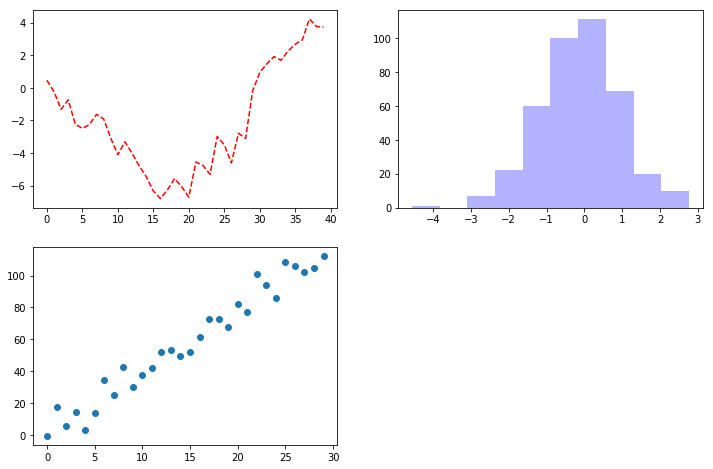

In [20]:
# Create an empty figure
fig = plt.figure(figsize=(12, 8))

# Run plt.figure? to check out figure options like size, dpi, color

axsp1 = fig.add_subplot(2, 2, 1)
# There will be 2 x 2 subplots on the figure and ax1 will put your figure on subplot 1

axsp2 = fig.add_subplot(2, 2, 2)
axsp3 = fig.add_subplot(2, 2, 3)
# Now, we have three AxesSubplot objects on our figure. 

# First plot: timeseries
axsp1.plot(np.random.randn(40).cumsum(), 'r--')

# Second plot: histogram
axsp2.hist(np.random.randn(400), bins=10, color='b', alpha=0.3)

# Third plot: scatterplot
axsp3.scatter(np.arange(30), 4 * np.arange(30) + 6 * np.random.randn(30))
# Note: if you make changes to the AxisSubplot object, you'll have to re-run the commands above

------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------

In [154]:
Series.plot?

# 2. Plotting in `pandas`

* There are high level plotting methods that take advantage of the fact that data are organized in DataFrames (have index, colnames)
* Both `Series` and `DataFrame` objects have a `pandas.plot` method for making different plot types
* Other parameters that can be passed to `pandas.plot` are:
    * `xticks, xlim, yticks, ylim`
    * `label`
    * `style` (as an abbreviation,) and `alpha`
    * `grid=True`
    * `rot` (rotate tick labels by and angle 0-360)
    * `use_index` (use index for tick labels)

### 2.1 One variable (plotting a Series)

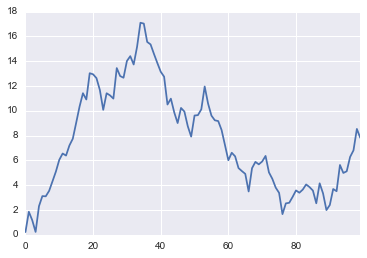

In [159]:
s = Series(np.random.randn(100).cumsum())

s.plot()
# Default is a line chart

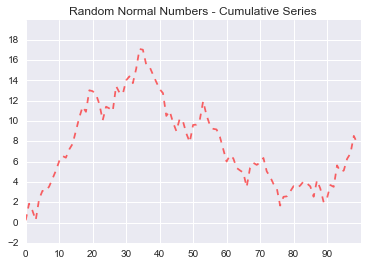

In [163]:
# Chart with options
s.plot(kind='line',
       grid=True, 
       legend=False,
       label='timeseries',
       title='Random Normal Numbers - Cumulative Series',
       xlim=(0, 100), 
       ylim=(-2, 20),
       xticks=np.arange(0, 100, 10), 
       yticks=np.arange(-2, 20, 2),
       style='r--', 
       alpha=0.6
      )

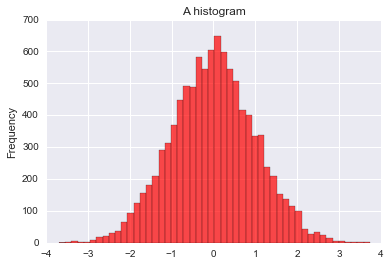

In [164]:
# One Variable as a Histogram
Series(np.random.randn(10000)).plot(kind='hist', 
                                    bins=50, 
                                    color='r', 
                                    alpha=0.7, 
                                    title='A histogram')

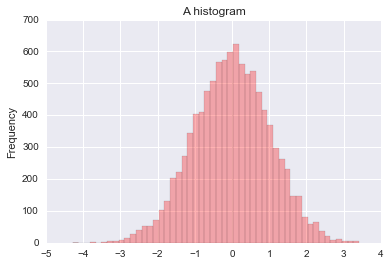

In [166]:
# One Variable as a Histogram
Series(np.random.randn(10000)).plot.hist(bins=50, 
                                         color='r', 
                                         alpha=0.3, 
                                         title='A histogram')

In [169]:
from scipy.stats import norm

s2 = norm.rvs(size=10000, loc=4, scale=0.5)
s3 = norm.rvs(size=10000, loc=-2, scale=1.5)

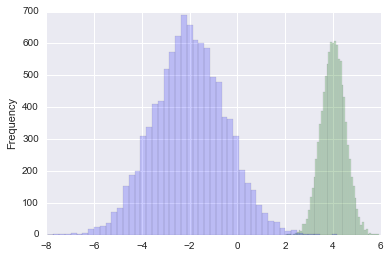

In [170]:
Series(s2).plot(kind='hist', bins=50, color='g', alpha=0.2)
Series(s3).plot(kind='hist', bins=50, color='b', alpha=0.2)
plt.savefig('twoHistograms.jpeg')

['.ipynb_checkpoints', 'Pandas-1.ipynb', 'Pandas-2.ipynb', 'pandas_Part1_v2.docx', 'pandas_Part2_v2.docx', 'Pandas_Slides.slides.html', 'train.csv', 'twoHistograms.jpeg']


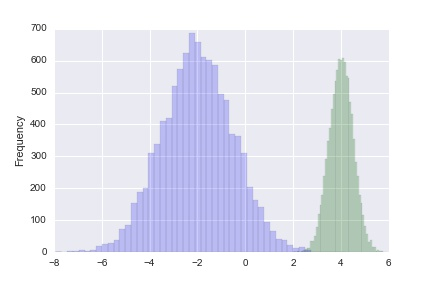

In [173]:
import os
print os.listdir(os.getcwd())

from IPython.display import Image
Image('twoHistograms.jpeg')

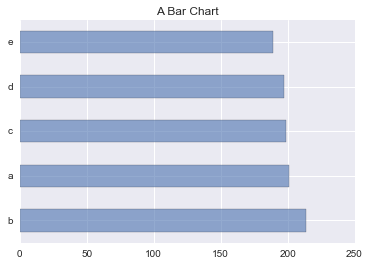

In [182]:
(Series(pd.cut(np.random.randint(1, 100, 1000), 5, labels=list('abcde')))
 .value_counts()
 .plot.barh(title='A Bar Chart',
          ylim=(0, 400),
          alpha=0.6))

------------------------------------------------------------------------------------------------------------------------

### c. Barplots

This is as simple as passing `kind=bar` or `kind=barh` (for horiz bars) to `pd.plot`

#### One Variable (simple barplot)

In [ ]:
import matplotlib.pyplot as plt

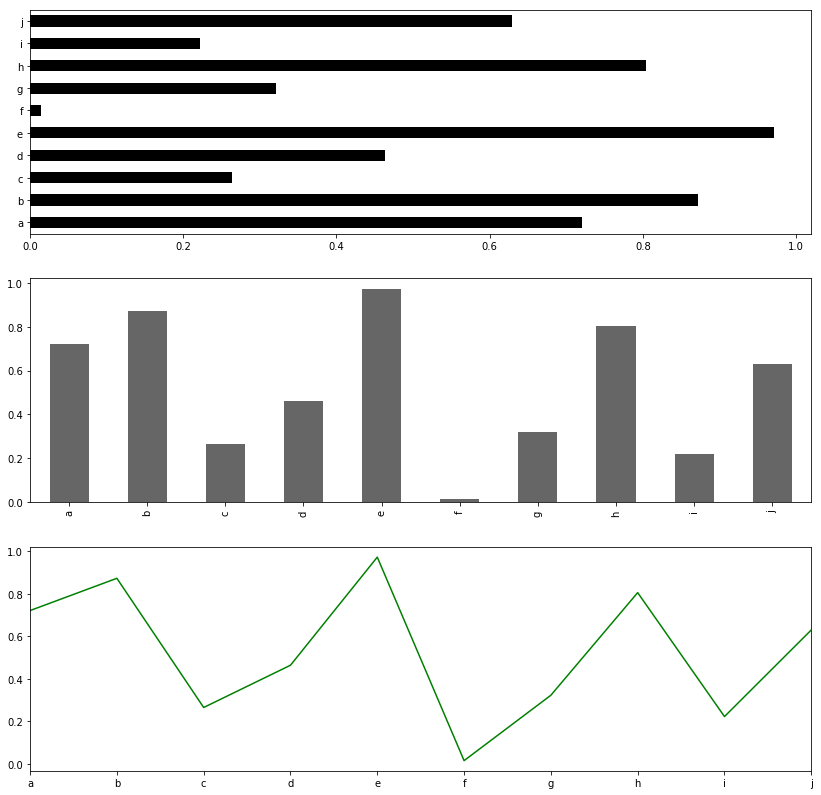

In [73]:
fig, axes = plt.subplots(3, 1, figsize=(14, 14))
s = Series(np.random.rand(10), index=list('abcdefghij'))

s.plot(kind='bar', 
       ax=axes[1], 
       color='k', 
       alpha=0.6)

s.plot(kind='barh', 
       ax=axes[0], 
       color='k')

s.plot(
    ax=axes[2], 
    color='g')

In [4]:
df = DataFrame(np.random.rand(5,5), index=list('ABCDE'), columns=list('PQRST'))
df

,P,Q,R,S,T
A,0.092984,0.956830,0.706483,0.809547,0.815357
B,0.323653,0.212445,0.758310,0.170976,0.992785
C,0.150331,0.841694,0.474552,0.492697,0.495372
D,0.685661,0.957104,0.169766,0.064867,0.161612
E,0.137644,0.687185,0.608991,0.255861,0.407293


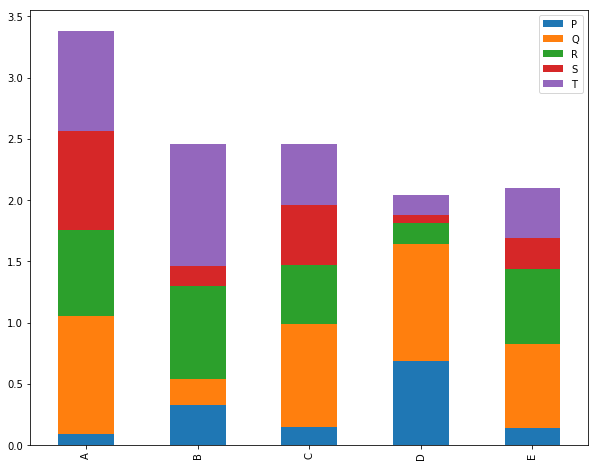

In [5]:
df.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.savefig('stackedBarcharts.jpeg')

> Note: Functions `value_counts()` and `pd.crosstab()` prove helpful to prepare data for stacked bar charts

------------------------------------------------------------------------------------------------------------------------

### d. Histograms & Density Plots

* _Histograms_: Pass `kind='hist'` to `pd.plot()` or use the method `pd.hist()`
* _Density Plots_: Use `kind='kde'`


### Using the `.hist()` method

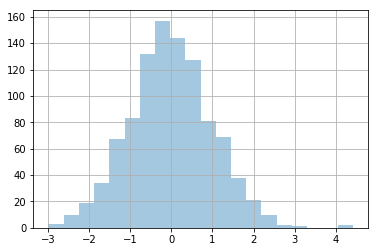

In [6]:
Series(np.random.randn(1000)).hist(bins=20, alpha=0.4)

### Using the `.plot()` method

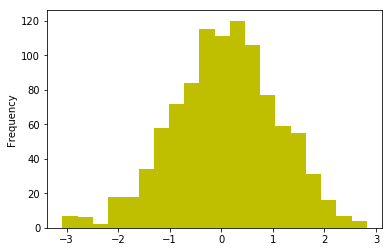

In [7]:
Series(np.random.randn(1000)).plot(kind='hist', bins=20, color='Y')

# e. Scatter Plots

- `.plot(kind='scatter')`
- `.scatter()`

In [232]:
df = DataFrame({'A': np.arange(50),
               'B': np.arange(50) + np.random.randn(50),
               'C': np.sqrt(np.arange(50)) + np.sin(np.arange(50)) })
print df[:10]

   A         B         C
0  0 -0.191895  0.000000
1  1 -0.745908  1.841471
2  2  2.179937  2.323511
3  3  3.676659  1.873171
4  4  4.102888  1.243198
5  5  5.598402  1.277144
6  6  6.706565  2.170074
7  7  6.863723  3.302738
8  8  9.191105  3.817785
9  9  7.346206  3.412118


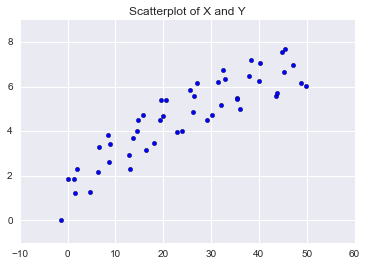

In [219]:
# Two variable Scatterplot
plt.scatter(df['B'], df['C'])
plt.title('Scatterplot of X and Y')

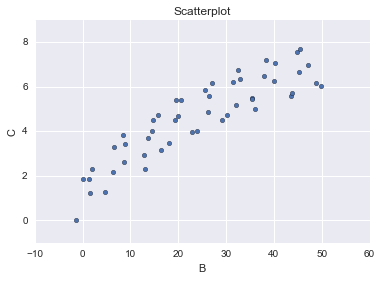

In [220]:
df.plot(kind='scatter', x='B', y='C', title = 'Scatterplot')

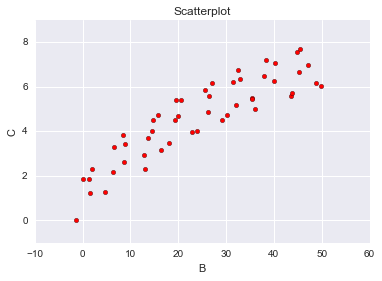

In [222]:
df.plot.scatter(x='B', y='C', title = 'Scatterplot', color='r')

------------------------------------------------------------------------------------------------------------------------

# _Group by_

In Data Analysis workflows, operations like `loading, cleaning and merging` are usually following by `summarizations` using some grouping variable(s). This includes _summary statistics_ over variables or groups within variables, within-group _transformations_ (like variable standardization), computing _pivot-tables_ and group analyses.

    


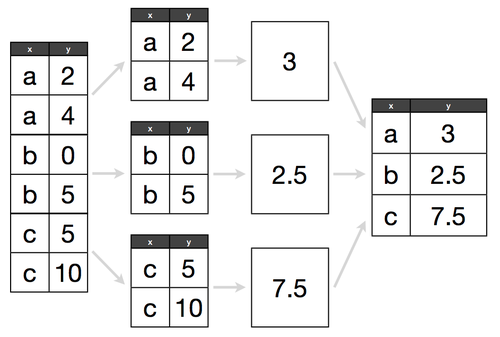

In [1]:
from IPython.display import Image
Image("http://i.imgur.com/yjNkiwL.png")

In [3]:
df = DataFrame({'k1': list('abcd' * 25),
               'k2': list('xy' * 25 + 'yx' * 25),
               'v1': np.random.rand(100),
               'v2': np.random.rand(100)}); df[:15]

,k1,k2,v1,v2
0,a,x,0.752431,0.361952
1,b,y,0.754897,0.492013
2,c,x,0.355529,0.152745
3,d,y,0.497797,0.136640
4,a,x,0.212749,0.615469
5,b,y,0.526604,0.546518
6,c,x,0.161246,0.950233
7,d,y,0.897057,0.956855
8,a,x,0.859481,0.654131
9,b,y,0.811959,0.798903


#### Syntax

`df.groupby('[<col-name(s)>]').apply(<udfs>) or <existing-function>`

### Grouping by one key 

**Results in a summarized data frame indexed by levels of the key**

In [30]:
df.groupby('k1').mean()

,v1,v2
k1,,
a,0.469323,0.572105
b,0.561503,0.480845
c,0.516660,0.624925
d,0.471861,0.395803


In [5]:
df.groupby('k2').sum()

,v1,v2
k2,,
x,26.235116,25.869488
y,30.221606,25.482480


### Grouping by two keys

**Results in a summarized data frame with a hierarchical index**

In [6]:
df.groupby(['k1', 'k2']).sum()

v1        v2
k1 k2                    
a  x   6.027513  7.334669
   y   5.652475  6.876054
b  x   6.696307  6.621764
   y   9.012235  5.529982
c  x   6.719417  5.737072
   y   7.554012  7.236942
d  x   6.791879  6.175983
   y   8.002885  5.839502

### Groupby objects Methods

---
### Task 1: 

1. Create a 100x4 DataFrame filled with random numbers (from a normal distribution.)
Ensure that there's 2 categorical columns with 5 and 3 categories each.

2. Create the groupby object using both keys and find the mean, max, median for each group.

---

### 9.1 Column-wise aggregations and UDFs

** For simple aggregations (Series or all numeric columns of a DataFrame) we can call methods like `mean` and `sum` **

In [37]:
# Summing a Series
# Syntax: Select a Series - GroupBy - Apply function
df['v1'].groupby(df['k1']).sum()

k1
a    11.733065
b    14.037569
c    12.916496
d    11.796520
Name: v1, dtype: float64

In [18]:
# Summing all Series of a DataFrame
# Syntax: Select DF - Groupby - Apply
df.groupby('k2').mean()

,v1,v2
k2,,
x,0.496958,0.505308
y,0.458565,0.477824


** or you can pass the name of a function as a string with the `.agg()` method **

In [38]:
df['v1'].groupby(df['k1']).agg('sum')

k1
a    11.733065
b    14.037569
c    12.916496
d    11.796520
Name: v1, dtype: float64

In [39]:
df.groupby(df.k1).agg('mean').add_prefix('mu_')

,mu_v1,mu_v2
k1,,
a,0.469323,0.572105
b,0.561503,0.480845
c,0.516660,0.624925
d,0.471861,0.395803


In [22]:
pd.concat([df.groupby(df.k1).agg('mean').add_prefix('mu_'),
           df.groupby(df.k1).agg('std').add_prefix('sigma_')], axis=1)

,mu_v1,mu_v2,sigma_v1,sigma_v2
k1,,,,
a,0.363707,0.531925,0.265244,0.331431
b,0.593283,0.497317,0.277901,0.302121
c,0.537082,0.476536,0.314205,0.315398
d,0.416975,0.460486,0.265980,0.273148


---
### The `.agg()` method

takes as argument the following:
* list of function names to be applied to all selected columns
* tuples of (colname, function) to be applied to all selected columns
* dict of (df.col, function) to be applied to each df.col

** 1. Apply >1 functions to selected column(s) by passing names of functions to `agg()`**

In [40]:
# Apply min, mean, max and max to v1 grouped by k1
df.groupby('k1').agg(['sum', 'mean', 'max'])

v1                             v2                    
          sum      mean       max        sum      mean       max
k1                                                              
a   11.733065  0.469323  0.986490  14.302637  0.572105  0.955630
b   14.037569  0.561503  0.997362  12.021133  0.480845  0.973653
c   12.916496  0.516660  0.975397  15.623129  0.624925  0.991595
d   11.796520  0.471861  0.976080   9.895080  0.395803  0.902370

In [47]:
# Apply min and max to all numeric columns of df grouped by k2
df.groupby('k1')[['v1']].agg(['min', 'max'])

v1          
         min       max
k1                    
a   0.035277  0.986490
b   0.009367  0.997362
c   0.150985  0.975397
d   0.008344  0.976080

### 2. We can supply names for the columns in the aggregated df

to the agg() method, in a list of tuples as `[(colname1, func1), (colname2, func2) ...] `

In [48]:
df.groupby('k1')[['v1', 'v2']].agg([('tot_sales', 'sum'), ('largest', 'max')])

v1                   v2          
    tot_sales   largest  tot_sales   largest
k1                                          
a   11.733065  0.986490  14.302637  0.955630
b   14.037569  0.997362  12.021133  0.973653
c   12.916496  0.975397  15.623129  0.991595
d   11.796520  0.976080   9.895080  0.902370

### 3. We can supply df columns and which funcs to apply to each

to the agg() method in a dictionary

In [28]:
# Apply max and min to v1; and mean and sum to v2; all grouped by k1
df[['v1', 'v2']].groupby(df['k1']).agg({'v1': ['max', 'min'], 'v2': ['mean', 'sum']})

v1                  v2           
         max       min      mean        sum
k1                                         
a   0.893726  0.039568  0.531925  13.298120
b   0.978749  0.018406  0.497317  12.432923
c   0.990357  0.033665  0.476536  11.913391
d   0.905911  0.025497  0.460486  11.512138

---
### Groupby Practice Tasks - Baseball Data

1. Import the data from this link http://bit.ly/144sh7t (hint: use read_csv) Call it `baseball`
2. Check column types, dataframe shape
3. How many rows have missing data? 
3. Find the proportion of missing values in each column
4. Find
    - The number of rows in every league
    - The count of records per year
    - Average, Median experience of players participating in each year

In [ ]:
baseball = pd.read_csv("http://bit.ly/144sh7t")

In [ ]:
baseball.columns.values